In [67]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
from scipy.signal import convolve
import scipy
from joblib import Parallel, delayed
import time
import sys
import os
from scipy import sparse
from copy import deepcopy
from tqdm import tqdm, tqdm_notebook

In [68]:
module_path = os.path.abspath("../Scripts/")
if module_path not in sys.path:
    sys.path.append(module_path)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
params = { #parameters relevant for the equations
        "Nh":                     1E5,
        "N0":                     1E9, #This Will be updated by self-consitent solution
        "R0":                      20, 
        "M":                       10, #Also L, total number of spacers
        "mu":                     100, #mutation rate
        "gamma_shape":             20,
        "Np":                     100, #Number of Cas Protein
        "dc":                      30, #Required number of complexes to activate defence
        "h":                       10, #coordination coeff
        "r":                     2000, #cross-reactivity kernel
        "beta":                     0,
        "rate_HGT":                 0,
        "HGT_bonus_acq_ratio":      0,
        "rate_recovery":            0,
        "HGT_type":                 0,
        "n_spacer":                 1,
        "A":                        1, 
    }
sim_params = { #parameters relevant for the simulation (including Inital Valuess)
        "continue":                 False, #DO NOT CREATE ARBITRARY FOLDERS ONLY FOR TESTS
        "xdomain":                  10000,
        "dx":                           1,
        "tf":                        4000,
        "dt":                           1,
        "dt_exact_fitness":             1,
        "dt_snapshot":                  1,
        "initial_mean_n":           [0,0],
        "initial_mean_nh":          [0,0],
        "conv_size":                 4000,
        "num_threads":                 32,
        "foldername":  "../Data_Single_Test_Det_Fit",
        "seed":                         34,
        "hard_N0":                   False,
    }

In [193]:
params["mu"]= 10
params["r"] = 100
params["A"] = 2
params["R0"] = 20
params["M"] = 10
params["Nh"] = 1E5

In [194]:
from initMethods import fill_parameters, init_cond
from supMethods import read_json
from formulas import plot_fitness_memory_dynamics, plot_wave_coverage, plot_wave_fitness, plot_wave_profiles
params, sim_params = init_cond(params, sim_params,out_print=True)
# params, sim_params = read_json(folder)

Phage Population: 2592.0000| Uc: 43.5343| sigma: 13.7769
Phage Population: 31337.5862| Uc: 53.8157| sigma: 14.5269
Phage Population: 34842.1197| Uc: 54.2306| sigma: 14.5548
Phage Population: 34976.1715| Uc: 54.2456| sigma: 14.5558
Phage Population: 34981.0081| Uc: 54.2462| sigma: 14.5558
Phage Population: 34981.1822| Uc: 54.2462| sigma: 14.5558
Assumptions Checks: 
mu >> 1 : mu = 10 >> 1
del_x << r : gamma_shape = 20 << r = 100
v*tau >> sigma : v*tau = 153.70195420305495 >> sigma = 14.555837082720238
uc << r : uc = 54.246153168289084 << r = 100


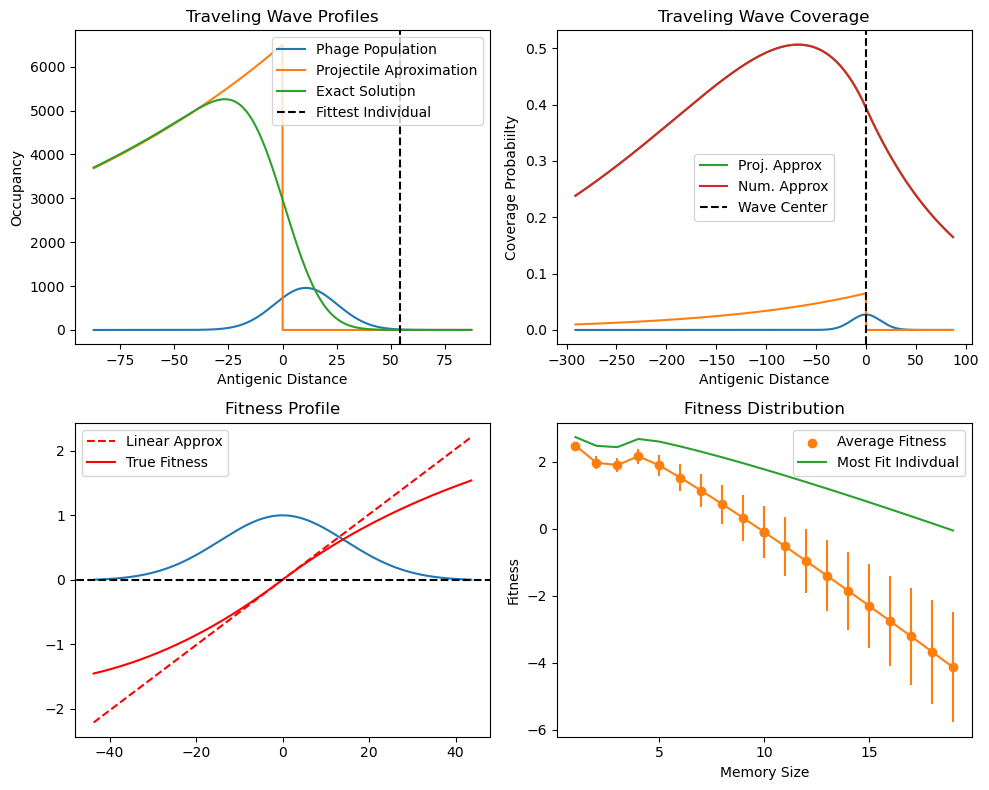

In [195]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a figure
fig = plt.figure(figsize=(10, 8))

# Define the grid layout with 3 rows and 3 columns
gs = gridspec.GridSpec(2, 2)

# Create the first two rows (2x2 grid)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

# Plot something in each subplot
plot_wave_profiles(params, sim_params, ax1)
plot_wave_coverage(params, sim_params, ax2)
plot_wave_fitness(params, sim_params, ax3)
plot_fitness_memory_dynamics(params, sim_params, ax4)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()